In [3]:
# show matplotlin inline without anomation
%matplotlib inline

import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
import numpy as np
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from collections import defaultdict

from law import read_experiments, parse_results, fit, optimize

In [5]:
path_lin_interp = "../logs/lin_interp_books_cc_0/experiment_history.yaml"
path = "../logs/bayesian-two-sources_0/experiment_history.yaml"
experiment_lin_interp = read_experiments(path_lin_interp)[0]
experiment = read_experiments(path)[0]

In [6]:
def get_val_and_weight(experiment: Experiment):
    val = []
    weight = []
    for trial in experiment.trials:
        val.append(trial.weighted_val_perplexity)
        weight.append(list(trial.true_mixing_weights.values())[0])
    weight_key = list(trial.true_mixing_weights.keys())[0]
    return val, weight, weight_key

Best val perplexity: 4.406554162502289


Text(0.5, 1.0, 'Mixign CC and Books')

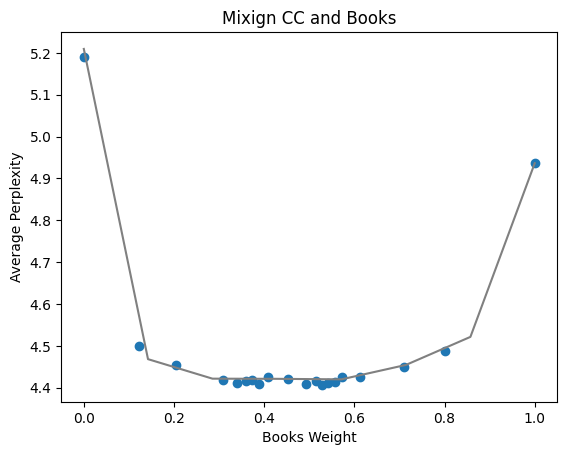

In [16]:
val_lin_interp, weight_lin_interp, weight_key_lin_interp = get_val_and_weight(experiment_lin_interp)
val, weight, weight_key = get_val_and_weight(experiment)

print(f"Best val perplexity: {min(val)}")

plt.plot(weight_lin_interp, val_lin_interp, color='gray')
plt.scatter(weight, val)

plt.xlabel(f"{weight_key} Weight" )
plt.ylabel("Average Perplexity")
plt.title("Mixign CC and Books")